C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.6471 - mean_squared_error: 0.2902 - val_loss: 0.4349 - val_mean_squared_error: 0.0805
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.5498 - mean_squared_error: 0.1955 - val_loss: 0.3949 - val_mean_squared_error: 0.0426
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.5129 - mean_squared_error: 0.1606 - val_loss: 0.3669 - val_mean_squared_error: 0.0165
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.4751 - mean_squared_error: 0.1247 - val_loss: 0.3602 - val_mean_squared_error: 0.0116
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.4731 - mean_squared_error: 0.1245 - val_loss: 0.3704 - val_mean_squared_error: 0.0235
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.3859 - mean_squared_error: 0.0390 - val_loss: 0.3944 - val_mean_squared_error: 0.0491
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.4024 - mean_squared_error: 0.0571 - val_loss: 0.4313 - val_mean_sq

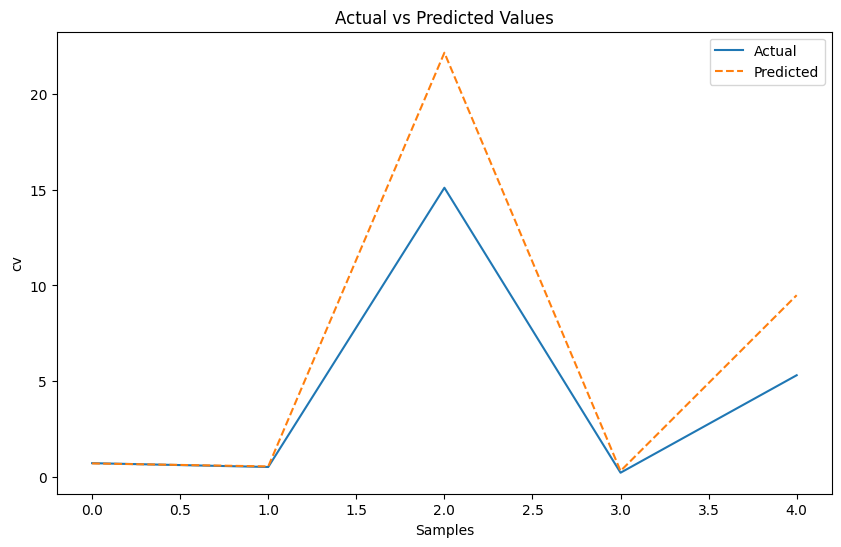

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

# Load and Prepare the Data
data = pd.read_csv('data.csv')  # Load the dataset
X = data.drop('cv', axis=1)  # Features
y = data['cv']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Target Scaling
scaler_y = MinMaxScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_y.transform(y_test.values.reshape(-1, 1))

# Define the Neural Network Model
model = Sequential()
model.add(Dense(512, input_shape=(X_train.shape[1],), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  # Output layer for regression

# Compile the Model with Adam Optimizer
model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

# Early Stopping Callback to Avoid Overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the Model
history = model.fit(X_train, y_train,
                    epochs=300,
                    batch_size=8,
                    validation_split=0.2,
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate the Model
mse = model.evaluate(X_test, y_test, verbose=0)[1]
print(f'Mean Squared Error on test set: {mse:.2f}')

# Make Predictions
y_pred = model.predict(X_test)

# Denormalize Predictions and Actual Values
y_pred_original = scaler_y.inverse_transform(y_pred)
y_test_original = scaler_y.inverse_transform(y_test)

# Display Predictions vs Actual
results = pd.DataFrame({'Actual': y_test_original.flatten(), 'Predicted': y_pred_original.flatten()})
print("\nPredictions vs Actual:")
print(results.head())

# Visualize Predictions vs Actual Values
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted', linestyle='--')
plt.title('Actual vs Predicted Values')
plt.xlabel('Samples')
plt.ylabel('cv')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
from tensorflow.keras.models import load_model

# 1. Load the saved Keras model
model = load_model('keras_model.h5')

# 2. Load the CSV file
# Replace 'input_data.csv' with your actual file name
data = pd.read_csv('input_data.csv')

# Preview the loaded data
print("Input Data:")
print(data.head())

# 3. Preprocess the data
# Ensure the data has the same columns/features as the model was trained on
# Example: Drop unnecessary columns or perform scaling if needed
# Assuming the model was trained on specific columns ['feature1', 'feature2', ..., 'featureN']
input_features = data[['feature1', 'feature2', 'feature3']]  # Update with actual column names

# 4. Make predictions
predictions = model.predict(input_features)

# 5. Save the predictions to a new CSV file
output_data = data.copy()
output_data['Predicted_Values'] = predictions  # Add predictions as a new column

# Save the updated data with predictions
output_data.to_csv('output_with_predictions.csv', index=False)

print("Predictions saved to 'output_with_predictions.csv'")


In [3]:
#ffnn

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

# Load and preprocess data
data = pd.read_csv('data1.csv')  # Replace with your dataset path
X = data.drop('Cv', axis=1)
y = data['Cv']

# Handle possible outliers in the target
y = np.clip(y, y.quantile(0.05), y.quantile(0.95))  # Limit to 5th-95th percentile

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Build the FFNN model without backpropagation
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(64))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(32))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1))  # Output layer

# Get the model's weights directly and propagate forward (no training)
model.set_weights([np.random.randn(*w.shape) for w in model.get_weights()])  # Initialize weights manually (random initialization)

# Forward pass to make predictions (no backpropagation)
predictions = model.predict(X_test).flatten()

# Reverse scaling to original range for predictions and actual values
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate R2 Score and Mean Absolute Error
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

print(f"Test MAE: {mae}, R2 Score: {r2}")

# Combine predictions with actual values
results = np.concatenate(
    (predictions_original.reshape(-1, 1), y_test_original.reshape(-1, 1)),
    axis=1
)
results_df = pd.DataFrame(results, columns=['Predicted Value', 'Actual Value'])

# Calculate custom accuracy (e.g., within ±10% tolerance)
tolerance = 0.1  # 10% tolerance
correct_predictions = np.abs(predictions_original - y_test_original) <= tolerance * y_test_original
accuracy = np.sum(correct_predictions) / len(y_test_original) * 100

# Display predictions and accuracy
print(f"Custom Accuracy (within ±10% tolerance): {accuracy:.2f}%")
print(results_df.head(10))  # Display the first 10 rows


Epoch 1/300


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.6596 - mse: 1.1035 - val_loss: 0.5671 - val_mse: 0.8808 - learning_rate: 0.0010
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6338 - mse: 1.2942 - val_loss: 0.5258 - val_mse: 0.8896 - learning_rate: 0.0010
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5323 - mse: 0.9998 - val_loss: 0.5156 - val_mse: 0.8428 - learning_rate: 0.0010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5329 - mse: 1.0018 - val_loss: 0.5087 - val_mse: 0.7776 - learning_rate: 0.0010
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5033 - mse: 0.9195 - val_loss: 0.5231 - val_mse: 0.7374 - learning_rate: 0.0010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4997 - mse: 0.8531 - val_loss: 0.5150 - val_mse: 0.7219 - learning_rate: 0.0010
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5402 - mse: 1.0284 - val_loss: 0.5070 - val_mse: 0.7196 - learning_rate: 0.0010
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━

In [4]:
#include back probagation

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU, BatchNormalization
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Load and preprocess data
data = pd.read_csv('data1.csv')  # Replace with your dataset path
X = data.drop('Cv', axis=1)
y = data['Cv']

# Handle possible outliers in the target
y = np.clip(y, y.quantile(0.05), y.quantile(0.95))  # Limit to 5th-95th percentile

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# Scale the target variable
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

# Build the FFNN model with improvements
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], kernel_regularizer=l2(0.01)))  # L2 regularization
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())  # Batch Normalization
model.add(Dropout(0.4))  # Increased dropout for better regularization

# Additional hidden layers
model.add(Dense(128, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(64, kernel_regularizer=l2(0.01)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.4))

# Output layer
model.add(Dense(1))  # Output layer

# Compile the model with an advanced optimizer
optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae', metrics=['mse'])

# Callbacks: Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=300,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
loss, mse = model.evaluate(X_test, y_test)
predictions = model.predict(X_test).flatten()

# Reverse scaling to original range for predictions and actual values
predictions_original = scaler_y.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Calculate R2 Score and Mean Absolute Error
mae = mean_absolute_error(y_test_original, predictions_original)
r2 = r2_score(y_test_original, predictions_original)

print(f"Test MAE: {mae}, R2 Score: {r2}")

# Combine predictions with actual values
results = np.concatenate(
    (predictions_original.reshape(-1, 1), y_test_original.reshape(-1, 1)),
    axis=1
)
results_df = pd.DataFrame(results, columns=['Predicted Value', 'Actual Value'])

# Calculate custom accuracy (e.g., within ±10% tolerance)
tolerance = 0.1  # 10% tolerance
correct_predictions = np.abs(predictions_original - y_test_original) <= tolerance * y_test_original
accuracy = np.sum(correct_predictions) / len(y_test_original) * 100

# Display predictions and accuracy
print(f"Custom Accuracy (within ±10% tolerance): {accuracy:.2f}%")
print(results_df.head(10))  # Display the first 10 rows


Epoch 1/300


C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\kkpr2\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 4.1829 - mse: 3.4926 - val_loss: 3.3830 - val_mse: 0.8924 - learning_rate: 0.0010
Epoch 2/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.4743 - mse: 4.8820 - val_loss: 3.3851 - val_mse: 0.8686 - learning_rate: 0.0010
Epoch 3/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.3040 - mse: 3.8629 - val_loss: 3.3932 - val_mse: 0.8683 - learning_rate: 0.0010
Epoch 4/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1747 - mse: 3.4133 - val_loss: 3.3842 - val_mse: 0.8501 - learning_rate: 0.0010
Epoch 5/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.1287 - mse: 3.1544 - val_loss: 3.3705 - val_mse: 0.8276 - learning_rate: 0.0010
Epoch 6/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4.0417 - mse: 3.1230 - val_loss: 3.3592 - val_mse: 0.8030 - learning_rate: 0.0010
Epoch 7/300
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.0828 - mse: 2.9950 - val_loss: 3.3493 - val_mse: 0.7924 - learning_rate: 0.0010
Epoch 8/300
4/4 ━━━━━━━━━━━━━━━━